#Paso 1 - importar librerias y cargar datos.

In [ ]:
#Cargado de Librerias
import pandas as pd
import numpy as np
import math
from math import factorial
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st



In [ ]:
#Carga del dataset
games_df = pd.read_csv("/datasets/games.csv")



#Paso 2 - Preparacion de datos

In [ ]:
#Reemplazar los nombres de las columnas (Minusculas)

new_col_names = []
for columns in games_df:
    col_lowered = columns.lower()
    new_col_names.append(col_lowered)
games_df.columns = new_col_names

print(games_df.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [ ]:
games_df.duplicated().sum()

0

In [ ]:
#Convierte los datos en los tipos necesarios
#Describir columnas y los cambios de tipo de datos
#Trata los valores ausentes

#Para user score, primero se remplazo tbd con Nan, de ahi se convirtieron los valores a numericos para obtener un promedio y se sustituyeron los NaNs con el promedio de user_score
games_df["user_score"] = games_df["user_score"].replace("tbd",np.nan)
games_df["user_score"] = pd.to_numeric(games_df["user_score"])
user_score_mean = games_df["user_score"].mean()
games_df["user_score"] = games_df["user_score"].replace(np.nan,user_score_mean)

#Para year_of_release, hay varias juegos que tienen NaN por lo cual como se desconoce el año entonces no nos sirven estos datos para nuestro analisas ya que queremos ver tendencias por año y estos datos no las incluyen
games_df["year_of_release"] = games_df["year_of_release"].replace("NaN",np.nan)
games_df["year_of_release"] = pd.to_numeric(games_df["year_of_release"])
games_df = games_df.dropna(subset=["year_of_release"])

print(games_df["year_of_release"].unique())

#Debido a la naturaleza de los datos se agrega el promedio en los valores faltantes ya que estos no afectan el resultado promedio de ninguna de los dos DF elminar esas filas de nuestros DF significara una perdida de datos en otros valores como las ventas por region
#Se ponen como Nan los Year_of_release de esta forma, al graficar no tendremos una columna adicional y no tendremos que agregar filtros para excluir el año 0 es mejor dejarlo como null

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983.]


In [ ]:
#Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
games_df["total_sales"] = games_df["na_sales"] + games_df["eu_sales"] + games_df["jp_sales"]


#Paso 3 - Analiza los datos

<AxesSubplot:title={'center':'Game count by year'}, xlabel='Release Year', ylabel='Games Released'>

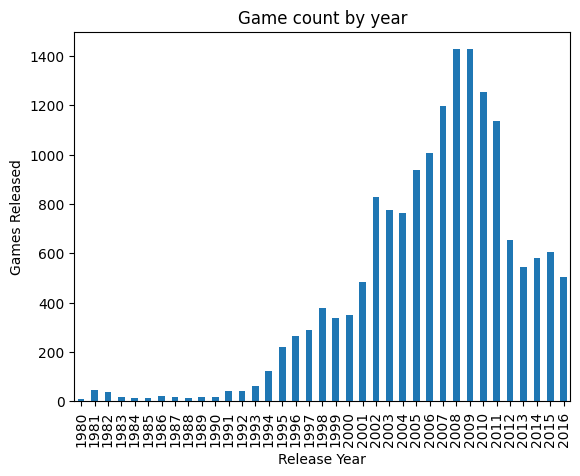

In [ ]:
#Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
year_count = games_df.groupby("year_of_release")["name"].count().reset_index()
year_count_columns_new = {"year_of_release" : "year_of_release", "name" : "release_count"}
year_count.rename(columns = year_count_columns_new, inplace = True)
year_count["year_of_release"] = year_count["year_of_release"].astype(int)
year_count.plot(x="year_of_release",y="release_count", kind="bar",xlabel="Release Year", ylabel="Games Released",title="Game count by year",legend=False)

#Los datos si son significativos, ya que hay una tendencia de incremento a partir de los 90s la cual repunta la grafica y a partir del 2008 empieaza a tener una tendencia negativa


#Ventas de una plataforma a otra:
* Plataformas con mayores ventas totales
* Distribucion por año
* Plataformas que solian ser populares, pero ahora no tienen ventas
* Cuanto tarda una plataforma nueva en aparecer.
* Cuanto tarda una plataforma antigua en desaparecer.

In [ ]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,7.125046,NaN,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.125046,NaN,30.38


   platform  total_sales
16      PS2      1043.09
28     X360       876.36
26      Wii       813.47
17      PS3       796.75
4        DS       743.74


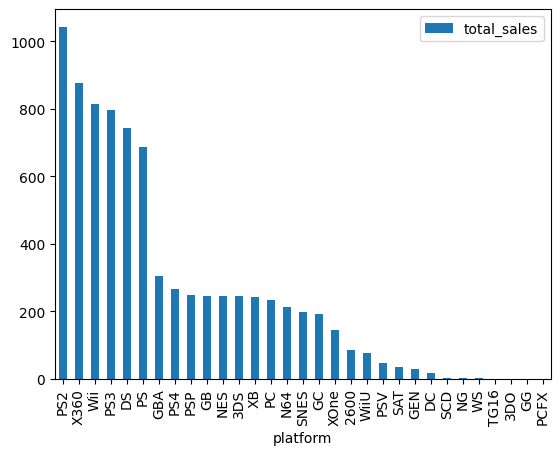

In [ ]:
#Prueba 1 plataforma con mayores ventas
total_platform_sales = games_df.groupby("platform")["total_sales"].sum().reset_index()
total_platform_sales = total_platform_sales.sort_values("total_sales", ascending=False)
total_platform_sales.plot(x="platform",y="total_sales",kind="bar")

print(total_platform_sales.head(5
                            ))








#Prueba 2 - distribucion por año


year_of_release  2000.0  2001.0  2002.0  2003.0  2004.0  2005.0  2006.0  \
platform                                                                  
DS                  NaN     NaN     NaN     NaN   15.91  119.34  111.64   
PS2               35.59  149.65  183.66  163.62  171.96  141.51   89.18   
PS3                 NaN     NaN     NaN     NaN     NaN     NaN   17.30   
Wii                 NaN     NaN     NaN     NaN     NaN     NaN  123.63   
X360                NaN     NaN     NaN     NaN     NaN    7.61   47.20   

year_of_release  2007.0  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  \
platform                                                                  
DS               135.85  134.37  110.99   79.48   24.30   10.42    1.42   
PS2               52.30   34.59   16.24    4.44    0.35     NaN     NaN   
PS3               62.48  101.78  113.08  121.36  135.22   90.87   95.85   
Wii              139.22  156.33  189.43  117.73   54.37   20.22    7.87   
X360              86.68 

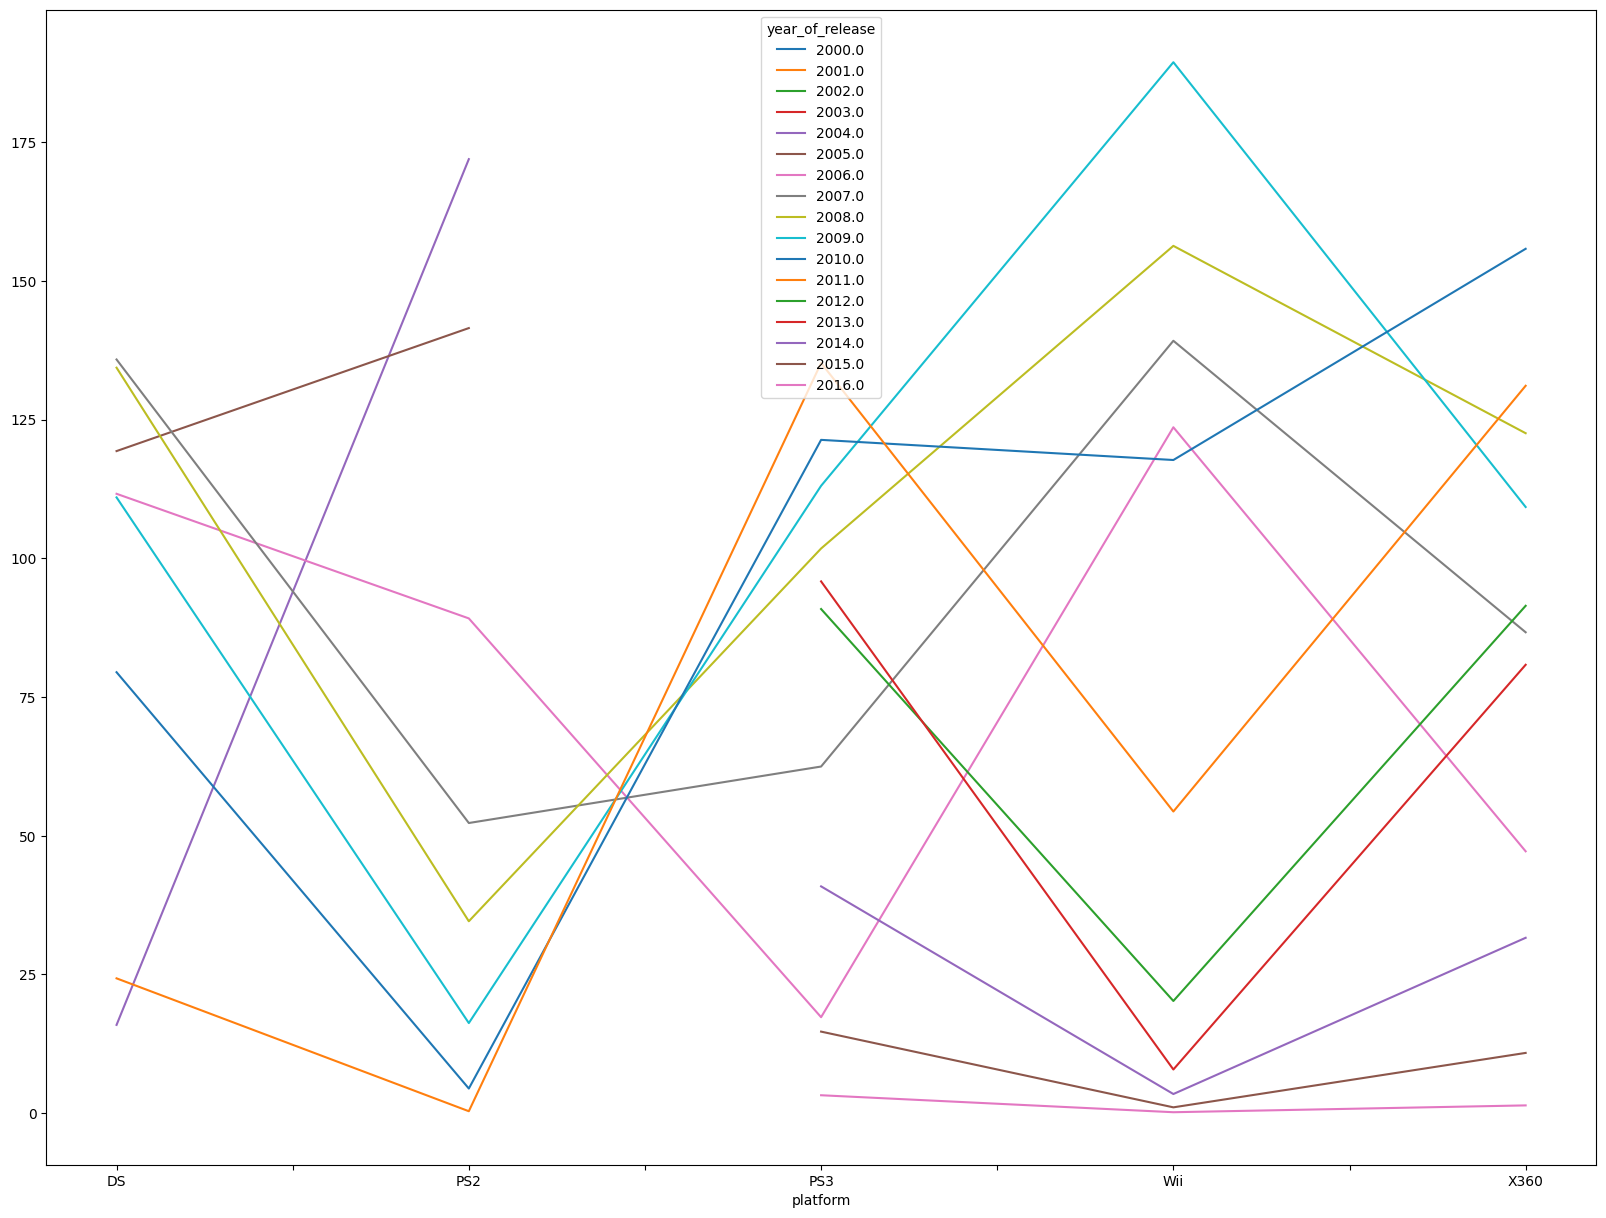

In [ ]:
highest_console_rows = ["DS","PS2", "PS3", "Wii", "X360"]
top_consoles_yearly = games_df[games_df['platform'].isin(highest_console_rows)]
top_consoles_yearly = top_consoles_yearly[top_consoles_yearly["year_of_release"] >= 2000.0]
total_sales_by_year = top_consoles_yearly.groupby(["platform","year_of_release"])["total_sales"].sum().unstack()
total_sales_by_year.plot(figsize=(20,15))
print(total_sales_by_year)






#bucle for que sobre highest console rows, para cada consola filtrar el dataframe. group by por año para calcular ventas totales.

   platform  total_sales
16      PS2      1043.09
28     X360       876.36
26      Wii       813.47
17      PS3       796.75
4        DS       743.74
15       PS       686.89
6       GBA       305.27
18      PS4       265.79
19      PSP       248.77
5        GB       246.27
11      NES       245.74
2       3DS       244.54
29       XB       243.09
13       PC       233.88
10      N64       213.70
23     SNES       196.82
7        GC       191.60
30     XOne       145.05
0      2600        85.64
27     WiiU        76.24
20      PSV        47.38
21      SAT        33.52
8       GEN        29.80
3        DC        15.68
22      SCD         1.81
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


<AxesSubplot:xlabel='total_sales'>

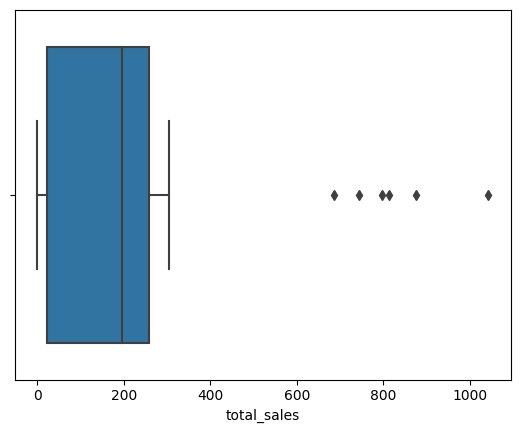

In [ ]:
#Caja de diagrama
#Diferencias significativas en las ventas
#ventas promedio en varias plataformas
total_sales_platform = games_df.groupby("platform")["total_sales"].sum().reset_index().sort_values(by="total_sales",ascending=False)
print(total_sales_platform)
sns.boxplot(total_sales_platform["total_sales"])

#Las ventas si tienen diferencias muy significantes basadas en el diagrama de caja, ya que hay muchos elementos los cuales se encuentran fuera del diagrama de caja y no son representativos de los demas.

0.2441969439828094


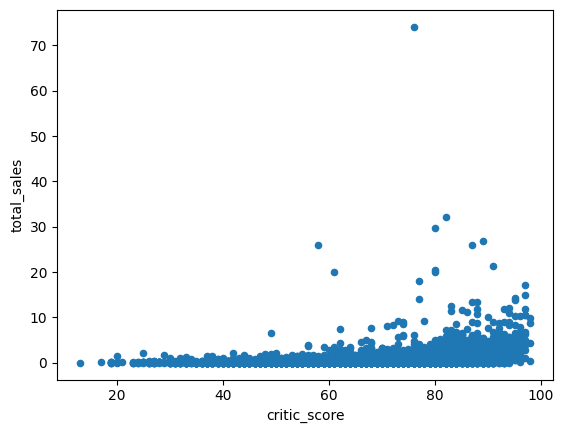

In [ ]:
#Como las reseñas afectan a las ventas
games_df.plot(kind="scatter",x="critic_score",y="total_sales")

print(games_df['critic_score'].corr(games_df['total_sales']))

#La relacion entre las reseñas de la critica y las ventas no estan relacionadas, ya que el resultado es muy poco casi todos los juegos se encuentran en un rango entre 15 o menos independientemente de la calificacion que le sea otorgada asi que mayor puntuacion no significa mayores ventas.


#Prueba 3 - Plataformas que solian ser populares, pero ahora no tienen ventas



In [ ]:
platform_last_release = games_df.groupby('platform')['year_of_release'].agg(lambda x: x.max()).reset_index()
platform_last_release["year_of_release"].rename("release_year")
platform_last_release = platform_last_release.sort_values(by="year_of_release")
unpopular_consoles = platform_last_release[platform_last_release['year_of_release'] < 2013]
print(unpopular_consoles)


#En esta tabla se representan todas las consales que a partir del 2013 han dejado de tener ventas de juegos, estas consolas tienen ya mas de 3 años que no son representativas en el mercado, por lo cual se pueden omitir


   platform  year_of_release
0      2600           1989.0
9        GG           1992.0
22      SCD           1994.0
8       GEN           1994.0
11      NES           1994.0
1       3DO           1995.0
24     TG16           1995.0
12       NG           1996.0
14     PCFX           1996.0
23     SNES           1999.0
21      SAT           1999.0
25       WS           2001.0
5        GB           2001.0
10      N64           2002.0
15       PS           2003.0
7        GC           2007.0
6       GBA           2007.0
29       XB           2008.0
3        DC           2008.0
16      PS2           2011.0


#Prueba 4 - Cuanto tarda una plataforma nueva en aparecer.

In [ ]:
platform_year_release["year_of_release"].shift(1)
platform_year_release["years_difference"] = platform_year_release["year_of_release"] - platform_year_release["year_of_release"].shift(1)
mean_release_window = platform_year_release["years_difference"].mean()
print(f"El tiempo promedio en que aparezca una consola nueva en el mercado es de: {mean_release_window} años")

El tiempo promedio en que aparezca una consola nueva en el mercado es de: 1.1 años


#Prueba 5 - Cuanto tarda una plataforma antigua en desaparecer.

In [ ]:
platform_year_range = games_df.groupby('platform')['year_of_release'].agg(lambda x: x.max() - x.min()).reset_index()
mean_console_duration = platform_year_range["year_of_release"].mean()
print(f"El tiempo promedio de vida de una consola es de: {mean_console_duration} años")



El tiempo promedio de vida de una consola es de: 7.612903225806452 años


#Paso 4 - perfil de usuario para cada region

Por region las 5 consolas principales y sus ventas

In [ ]:
#Top consoles NA
top_consoles_yearly_na = games_df.groupby("platform")["na_sales"].sum().reset_index()
top_consoles_yearly_na = top_consoles_yearly_na.sort_values(by="na_sales",ascending=False)
top_consoles_yearly_na = top_consoles_yearly_na.head(5)
mean_sales_na = top_consoles_yearly_na["na_sales"].mean()

#Top consoles EU
top_consoles_yearly_eu = games_df.groupby("platform")["eu_sales"].sum().reset_index()
top_consoles_yearly_eu = top_consoles_yearly_eu.sort_values(by="eu_sales",ascending=False)
top_consoles_yearly_eu = top_consoles_yearly_eu.head(5)
mean_sales_eu = top_consoles_yearly_eu["eu_sales"].mean()

#Top consoles JP
top_consoles_yearly_jp = games_df.groupby("platform")["jp_sales"].sum().reset_index()
top_consoles_yearly_jp = top_consoles_yearly_jp.sort_values(by="jp_sales",ascending=False)
top_consoles_yearly_jp = top_consoles_yearly_jp.head(5)
mean_sales_jp = top_consoles_yearly_jp["jp_sales"].mean()

#Una de las principales diferencias entre estos datos son sus promedios en general, de ahi podemos partir de las diferencias en ventas en cada una de las regiones
print(f"El promedio de ventas en NA es de: {mean_sales_na}")
print(f"El promedio de ventas en EU es de: {mean_sales_eu}")
print(f"El promedio de ventas en JP es de: {mean_sales_jp}")

#Aqui podemos obeservar que las ventas promedio de cada region es muy diferente y se distancian en algunos casos hasta en un doble o aproximados al doble.


El promedio de ventas en NA es de: 485.19399999999797
El promedio de ventas en EU es de: 279.7739999999981
El promedio de ventas en JP es de: 133.9020000000002


Cinco generos principales por region

In [ ]:
genres_top5 = games_df["genre"].value_counts()
print(genres_top5.head(5))

#print(top_consoles_yearly_na)

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Name: genre, dtype: int64


Conclusion: El genero accion, es un genero que se basa en muchos tipos de accion se puede interpretar desde peleas hasta disparos pero son categorizados como accion debido al alto contenido de secuencias o enfrentamientos freneticos

Sports se carazteriza por cualquier tipo de deporte, desde el Futbol hasta el Hockey entre muchos otros.

Misc estos son generos que no tienen una clasificacion como tal es decir pueden hacer multiples cosas, podrian tener accion, terror o multiples generos dentro del mismo

Role-Playing aqui se toma el papel de un personaje especifico y se le da al jugador una vasta habilidad de eleccion se caracterizan por estadisticas ya que el jugador puede tener muchos atributos diferentes y especializrse como0 por ejemplo en fuerza, destreza o en inteligencia

Shooter son juegos que se enfocan en disparos no necesariamente con armas, pero puede ser por ejemplo un juego de superheroes en el que todos tienen un tipo de arma que arrojan a los enemigos para cumplir con un objetivo

Clasificacion de ESRB

<AxesSubplot:xlabel='rating'>

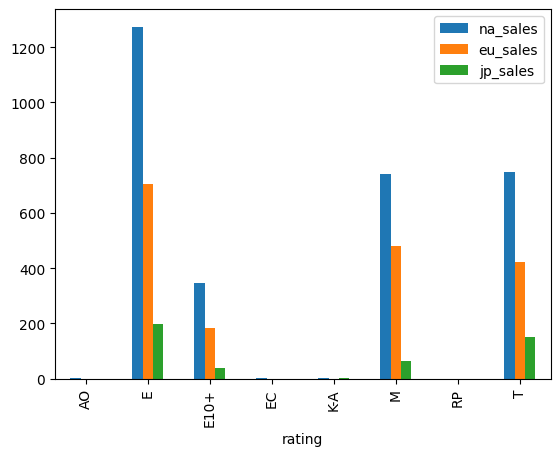

In [ ]:
#Primero obtenemos las ventas de cada rating de la ESRB por cada region
esrb_sales_na = games_df.groupby("rating")["na_sales"].sum().reset_index()
esrb_sales_eu = games_df.groupby("rating")["eu_sales"].sum().reset_index()
esrb_sales_jp = games_df.groupby("rating")["jp_sales"].sum().reset_index()

#Despues haremos merge de los 3 dataframes para poder compararlos.
esrb_sales_regions = esrb_sales_na.merge(esrb_sales_eu,on="rating",how="left")
esrb_sales_regions = esrb_sales_regions.merge(esrb_sales_jp,on="rating",how="left")

esrb_sales_regions.plot(x="rating",kind="bar")

#Con esto podemos demostrar que los juegos con mayor ingreso son los que estan clasificados con E, ya que significan Everyone que es para todos asi que no hay una limitante de edad.


Conclusion: Con esto podemos demostrar que los juegos con mayor ingreso son los que estan clasificados con E, ya que significan Everyone que es para todos asi que no hay una limitante de edad, esto tambien lo hace independientemente de la region ya que en en todas las clasificaciones con mayores ventas el patron es el mismo NA lidera, EU le sigue en segundo y JP siempre queda como el menor.

#Paso 5 - prueba de hipotesis

Las calificaciones promedio para Xbox One y PC son las mismas

Hipotesis nula: el promedio de las clasificaciones no es diferente para Xbox One y PC


In [ ]:
games_df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10226,Breakout,PS,1999.0,Puzzle,0.06,0.04,0.0,0.01,NaN,7.125046,E,0.10
11173,Petz: Saddle Club,PSP,2009.0,Simulation,0.08,0.00,0.0,0.01,NaN,7.125046,E,0.08
2941,Halo 2 Multiplayer Map Pack,XB,2005.0,Shooter,0.54,0.13,0.0,0.02,89.0,7.400000,M,0.67
12487,Imagine: Gymnast,DS,2008.0,Simulation,0.05,0.01,0.0,0.00,NaN,7.125046,E,0.06
13303,The Lord of the Rings: The Battle for Middle-E...,X360,2006.0,Strategy,0.00,0.04,0.0,0.00,79.0,7.500000,T,0.04


In [ ]:
from scipy import stats as st

user_scores = games_df[['platform', 'user_score']]
xbox_one_user_scores = user_scores[user_scores['platform'] == "XOne"]
pc_user_scores = user_scores[user_scores['platform'] == "PC"]

alpha = 0.5

results = st.ttest_ind(xbox_one_user_scores["user_score"],pc_user_scores["user_score"])

print("valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")


valor p: 3.039516169044684e-05
Rechazamos la hipotesis nula


Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipotesis nula: el promedio de las clasificaciones no es diferente para los generos de Action y Sports

In [ ]:
from scipy import stats as st

genre_scores = games_df[['genre', 'user_score']]
action_scores = genre_scores[genre_scores['genre'] == "Action"]
sports_scores = genre_scores[genre_scores['genre'] == "Sports"]

alpha = 0.5

results = st.ttest_ind(action_scores["user_score"],sports_scores["user_score"])

print("valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

valor p: 0.12279663539579658
Rechazamos la hipotesis nula


#Paso 6 - conclusion general

En conclusion si hay multiples varianzas en los datos dependiendo de como categoricemos o comparemos algunos datos, no parece ser una similitud muy grande entre datos pero si se notan las diferencias en cada region no solo por la cantidad de ventas, pero si lo analizamos mas a profundidas tambien seria importante contabilizar la cantidad de consolas vendidas en cada area y no solo el juego, esto para darle mas profundidad a nuestro analisis pero son datos adicionales que no son necesarios para nuestro proyecto.


Es importante destacar que los datos pueden ser mejor aprovechados para analizar temas de calificacion y generos de los videojuegos en si, pero para los temas principales como son las plataformas los datos no son los correctos para analizarlos.